In [1]:
# Дан датасет с информацией о жилье
# В файле train.csv находятся данные для обучения
# В файле test.csv - для проверки
# Необходимо научиться прогнозировать цену на жилье на основании тренировочных данных


In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [6]:
data = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [7]:
data.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.5+ MB


In [9]:
# Приводим типы
data['Ecology_2'] = data['Ecology_2'].astype('category')
data['Ecology_3'] = data['Ecology_3'].astype('category')
data['Shops_2'] = data['Shops_2'].astype('category')
data['Rooms'] = data['Rooms'].astype('int')
data['HouseFloor'] = data['HouseFloor'].astype('int')

In [10]:
# Заполняем пропуски в данных
# Сначала это стоит делать самым простым способом 

data['Healthcare_1'] = data['Healthcare_1'].fillna(data['Healthcare_1'].mean());
data['LifeSquare'] = data['LifeSquare'].fillna(data['LifeSquare'].mean());

test['Healthcare_1'] = data['Healthcare_1'].fillna(test['Healthcare_1'].mean());
test['LifeSquare'] = data['LifeSquare'].fillna(test['LifeSquare'].mean());

In [11]:
data = pd.get_dummies(data)
test = pd.get_dummies(test)

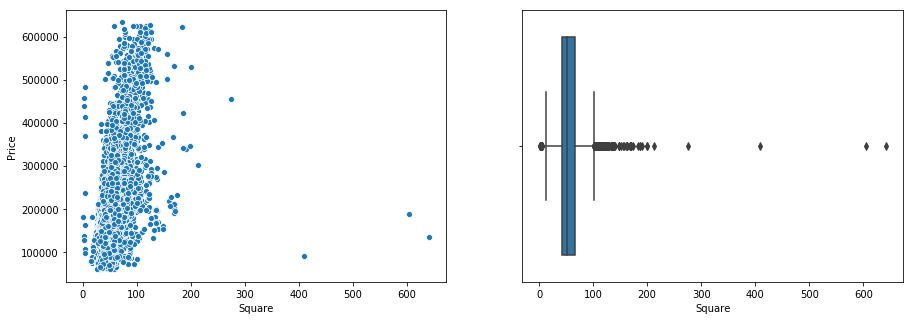

In [12]:
fig, axs = plt.subplots(ncols=2)

sns.scatterplot('Square', 'Price', data=data, ax=axs[0])
sns.boxplot(x="Square", data=data, ax=axs[1])
fig.set_size_inches(15, 5)
plt.show()

In [13]:
data = data[data['Square'] < 140]
data = data[data['Square'] > 10]

data = data[data['Price'] > 30000]
data = data[data['Price'] < 600000]

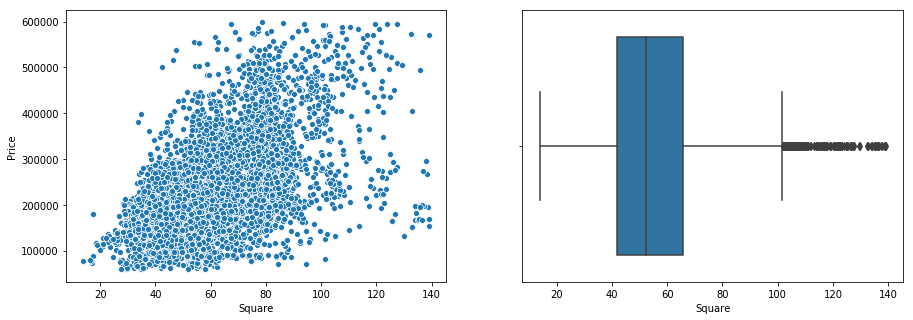

In [14]:
fig, axs = plt.subplots(ncols=2)

sns.scatterplot('Square', 'Price', data=data, ax=axs[0])
sns.boxplot(x="Square", data=data, ax=axs[1])
fig.set_size_inches(15, 5)
plt.show()

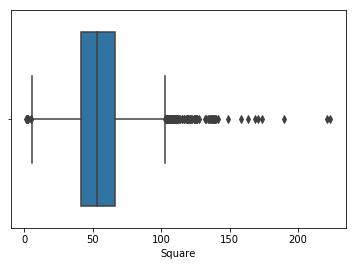

In [15]:
# Что делать в таких случаях?
# Надо ли масштабировать test['Square']
# Стоит ли выбрасывать данные из data?

sns.boxplot(x="Square", data=test)
plt.show()

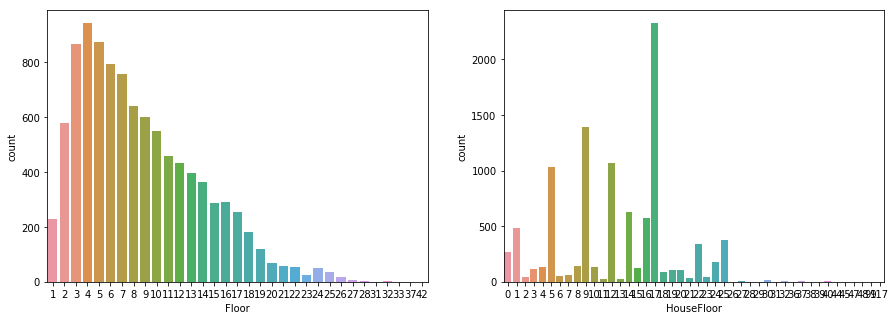

In [16]:
# мы видим, что в да
fig, axs = plt.subplots(ncols=2)

sns.countplot('Floor', data=data, ax=axs[0])
sns.countplot('HouseFloor', data=data, ax=axs[1])
fig.set_size_inches(15, 5)
plt.show()

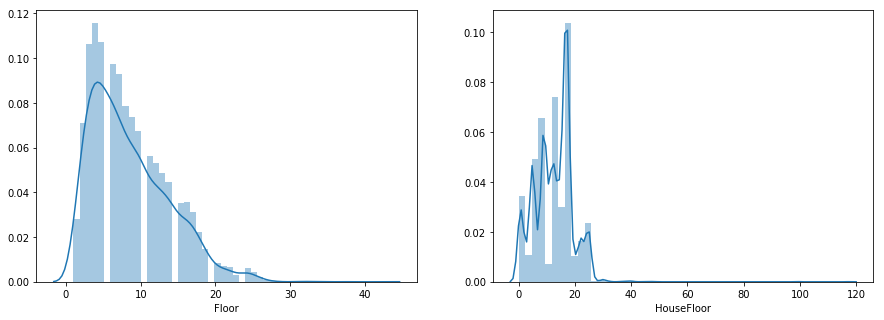

In [17]:
fig, axs = plt.subplots(ncols=2)

sns.distplot(data['Floor'], kde=True, ax=axs[0])
sns.distplot(data['HouseFloor'], kde=True, ax=axs[1])
fig.set_size_inches(15, 5)
plt.show()

In [18]:
skew = data['Floor'].skew()
kurt = data['Floor'].kurt()
print(f'Floor skew: {skew}, kurt: {kurt}')

Floor skew: 0.8687748792149557, kurt: 0.48078472970666564


In [19]:
skew = data['HouseFloor'].skew()
kurt = data['HouseFloor'].kurt()
print(f'HouseFloor skew: {skew}, kurt: {kurt}')

HouseFloor skew: 0.8269020522373136, kurt: 10.801252316219133


In [20]:
data.shape

(9939, 23)

In [21]:
data = data[(np.abs(stats.zscore(data.select_dtypes(include=np.number))) < 3).all(axis=1)]

In [22]:
data.shape

(7622, 23)

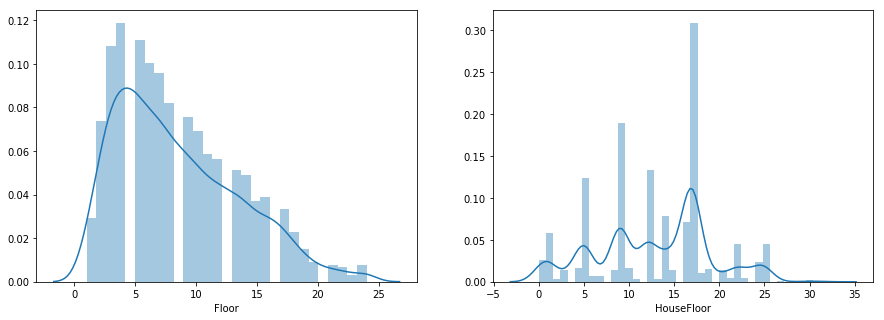

In [23]:
fig, axs = plt.subplots(ncols=2)

sns.distplot(data['Floor'], kde=True, ax=axs[0])
sns.distplot(data['HouseFloor'], kde=True, ax=axs[1])
fig.set_size_inches(15, 5)
plt.show()

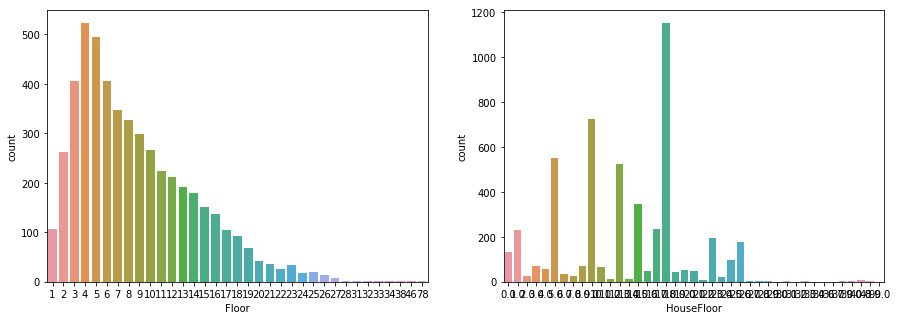

In [24]:
fig, axs = plt.subplots(ncols=2)

sns.countplot('Floor', data=test, ax=axs[0])
sns.countplot('HouseFloor', data=test, ax=axs[1])
fig.set_size_inches(15, 5)
plt.show()

In [25]:
data = data[data['HouseFloor'] <= 25]

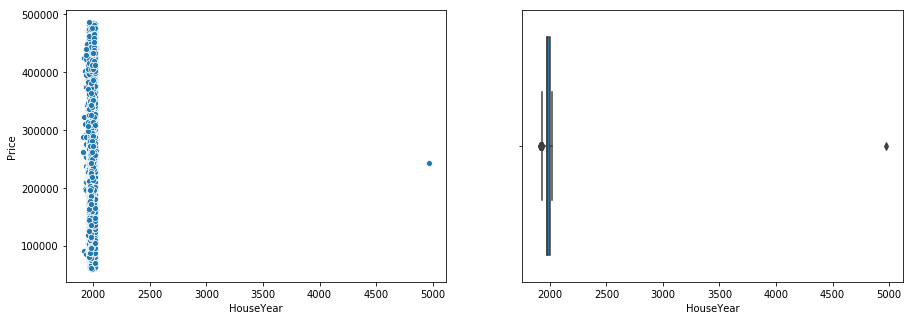

In [26]:
fig, axs = plt.subplots(ncols=2)

sns.scatterplot('HouseYear', 'Price', data=data, ax=axs[0])
sns.boxplot(x="HouseYear", data=data, ax=axs[1])
fig.set_size_inches(15, 5)
plt.show()

In [27]:
data = data[data['HouseYear'] > 1900]
data = data[data['HouseYear'] < 2018]

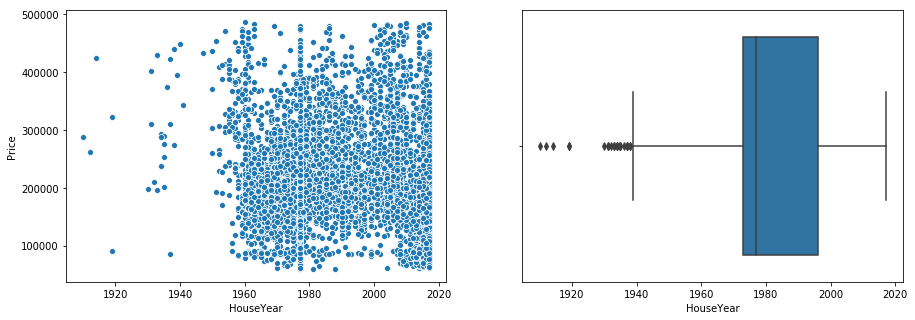

In [28]:
fig, axs = plt.subplots(ncols=2)

sns.scatterplot('HouseYear', 'Price', data=data, ax=axs[0])
sns.boxplot(x="HouseYear", data=data, ax=axs[1])
fig.set_size_inches(15, 5)
plt.show()

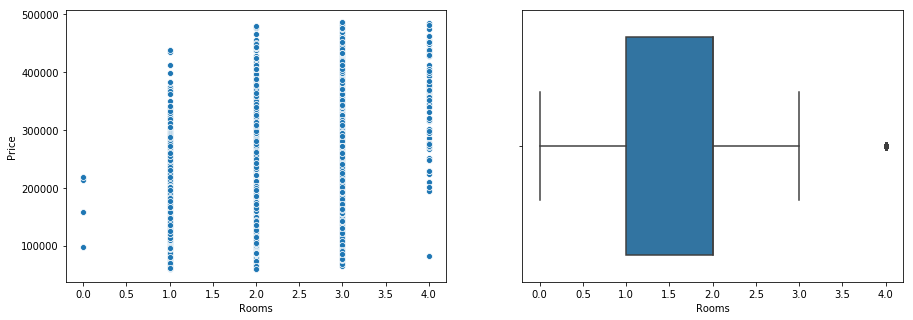

In [29]:
fig, axs = plt.subplots(ncols=2)

sns.scatterplot('Rooms', 'Price', data=data, ax=axs[0])
sns.boxplot(x="Rooms", data=data, ax=axs[1])
fig.set_size_inches(15, 5)
plt.show()

In [30]:
data = data[data['Rooms'] < 10]

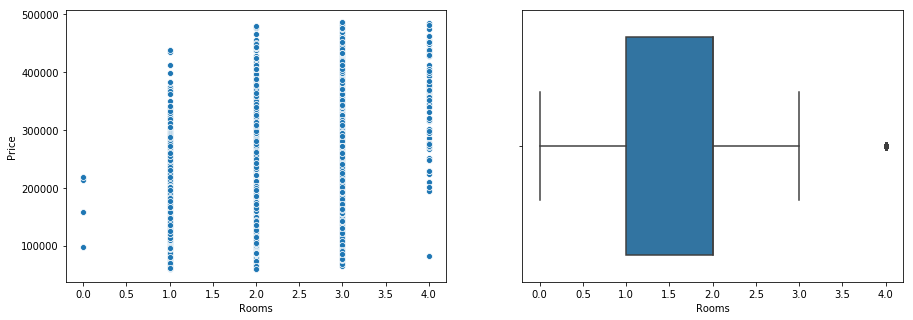

In [31]:
fig, axs = plt.subplots(ncols=2)

sns.scatterplot('Rooms', 'Price', data=data, ax=axs[0])
sns.boxplot(x="Rooms", data=data, ax=axs[1])
fig.set_size_inches(15, 5)
plt.show()

In [32]:
# Также в данных можно увидеть, что есть масса случаев, когда Floor > HouseFloor
# исправим это

np.where(data['Floor'] > data['HouseFloor'], data['Floor'], data['HouseFloor']);

In [33]:
# После чистки данных у нас появились колонки, в которых .nunique() == 1
# Такие колонки не несут никакого смысла, от них надо избавиться

cols_for_drop = []

for column in data.columns:
    if data[column].nunique() == 1:
        data = data.drop(column, axis=1)
        cols_for_drop.append(column)        

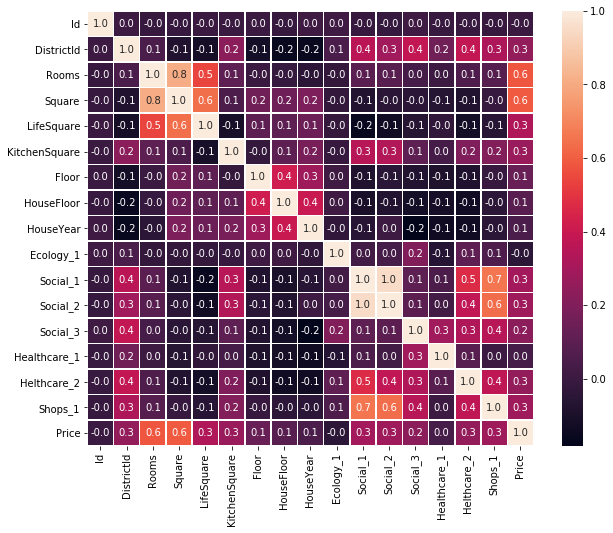

In [34]:
fig, ax = plt.subplots(figsize=(10,8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".1f", linewidths=.5, ax=ax);

In [35]:
# а теперь займемся feature-engineering-ом!
# мы видим, что наибольшее влияние на Price оказывают DistrictId, Rooms и Square
# попробуем смастерить из них одно поле
# ...
# после ряда экспериментов пришел к такому варианту:

def round_square(x, base=20):
    return int(base * round(float(x)/base))

data['Square_Class'] = data['Square'].apply(round_square)
test['Square_Class'] = test['Square'].apply(round_square)

In [36]:
# пришла пора разделить обучающую выборку на тренировочную и валидационную
# и начать обучение

In [37]:
x_train, x_valid, y_train, y_valid = train_test_split(
    data,
    data['Price'],
    test_size=0.2,
    random_state=42
)

mean_price = data['Price'].mean()
grouped = x_train.groupby(['Square_Class', 'Rooms'])[['Price']].mean().reset_index().rename(columns={'Price': 'mean_price'})

x_train_extended = pd.merge(x_train, grouped, on=['Square_Class', 'Rooms'], how='left')
x_valid_extended = pd.merge(x_valid, grouped, on=['Square_Class', 'Rooms'], how='left')

x_valid_extended['mean_price'] = x_valid_extended['mean_price'].fillna(mean_price);

In [38]:
x_train_extended = x_train_extended.drop('Price', axis=1)
x_valid_extended = x_valid_extended.drop('Price', axis=1)

scaler = StandardScaler()
scaler.fit(x_train_extended)

cols = x_train_extended.columns # ???
x_train_extended_scaled = scaler.transform(x_train_extended);

In [39]:
lr = LinearRegression()
reg = lr.fit(x_train_extended_scaled, y_train)

x_valid_extended_scaled = scaler.transform(x_valid_extended)
y_predict = lr.predict(x_valid_extended_scaled)

sqerr = mean_squared_error(y_valid, y_predict)
R2 = r2_score(y_valid, y_predict)

print(f'sqerr: {sqerr}, r2: {R2}')

sqerr: 2750985156.360998, r2: 0.5795133089144981


In [44]:
rfreg = RandomForestRegressor(max_depth=14, max_features=12, random_state=42, n_estimators=150)
reg2 = rfreg.fit(x_train_extended, y_train)

y_predict = reg2.predict(x_valid_extended)

sqerr = mean_squared_error(y_valid, y_predict)
R2 = r2_score(y_valid, y_predict)

print(f'sqerr: {sqerr}, r2: {R2}')

sqerr: 1669444946.5736945, r2: 0.7448261834815703


In [41]:
knn = KNeighborsRegressor(n_neighbors=6, weights='distance')
knn.fit(x_train_extended_scaled, y_train)

x_valid_extended_scaled = scaler.transform(x_valid_extended)
y_predict = knn.predict(x_valid_extended_scaled)

sqerr = mean_squared_error(y_valid, y_predict)
R2 = r2_score(y_valid, y_predict)
print(f'sqerr: {sqerr}, r2: {R2}')

sqerr: 2133822928.0890436, r2: 0.6738462436557044


In [42]:
# Лучшие результаты показал RandomForest
# конечно, деревья склонны к переобучению, но пока будем считать победителем его

In [43]:
# предсказание с использованием победителя

# заполняем для тестовых данных колонку mean_price на основании тренировочных данных
test_extended = pd.merge(test, grouped, on=['Square_Class', 'Rooms'], how='left')

for col in cols_for_drop:
    test_extended = test_extended.drop(col, axis=1)

# пропущенные строки заполняем средним значением цены
test_extended['mean_price'] = test_extended['mean_price'].fillna(mean_price);

test_predict = reg2.predict(test_extended)
test_predict

array([160952.80736809, 226738.02289273, 146493.25199813, ...,
       303659.95298276, 243522.81597761, 291704.55404155])